# House Price Predictions

## Import necessary libraries

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Data Preprocessing

In [15]:
# Load the dataset
data = pd.read_csv('data.csv')

In [16]:
# Display basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [17]:
# Drop irrelevant columns
columns_to_drop = ['date', 'street', 'city', 'statezip', 'country']
data.drop(columns=columns_to_drop, inplace=True)

In [18]:
# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)

# Check for duplicate entries
data.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

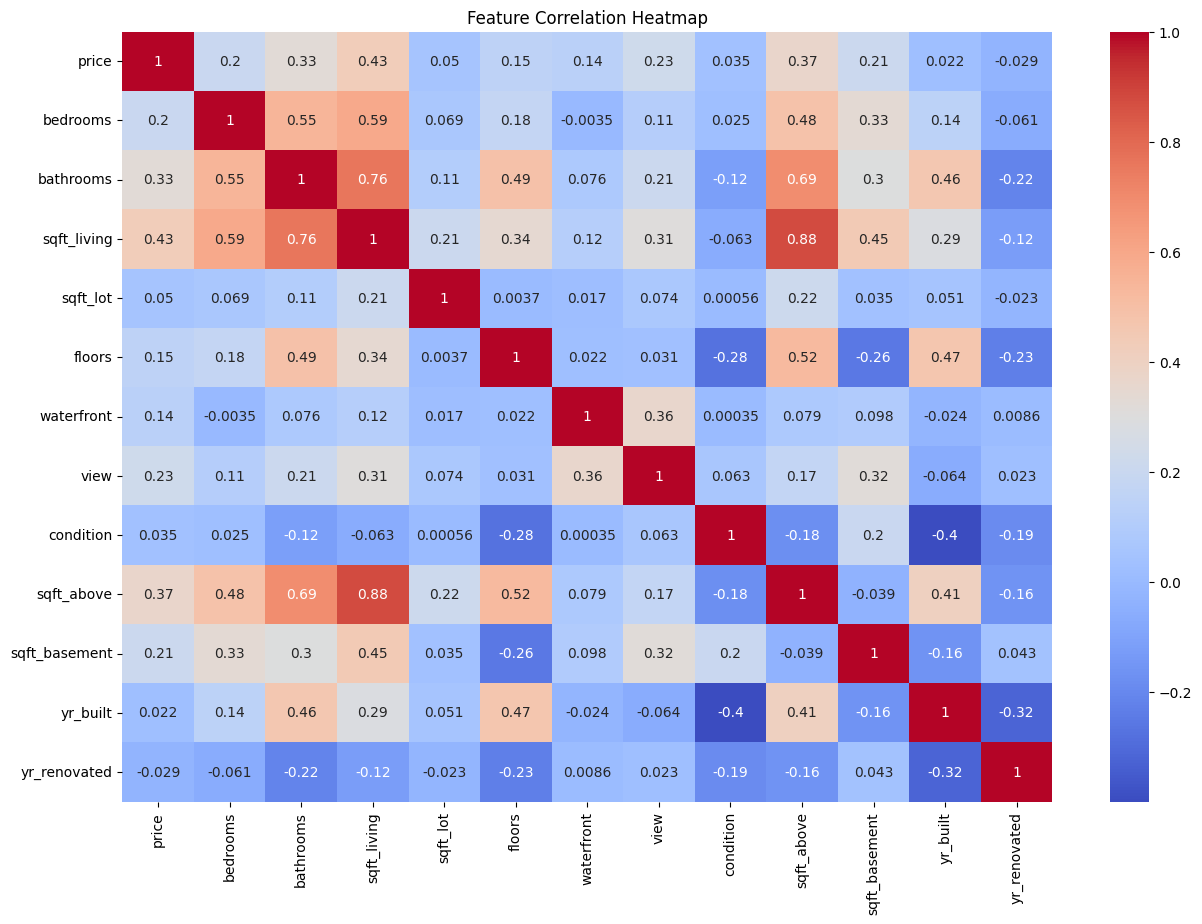

In [19]:
# Check correlations and distributions
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

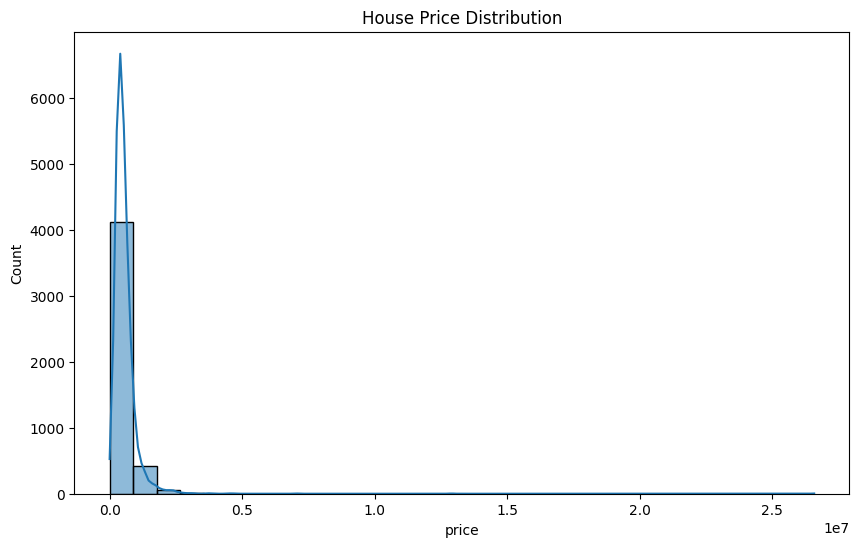

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=30)
plt.title('House Price Distribution')
plt.show()

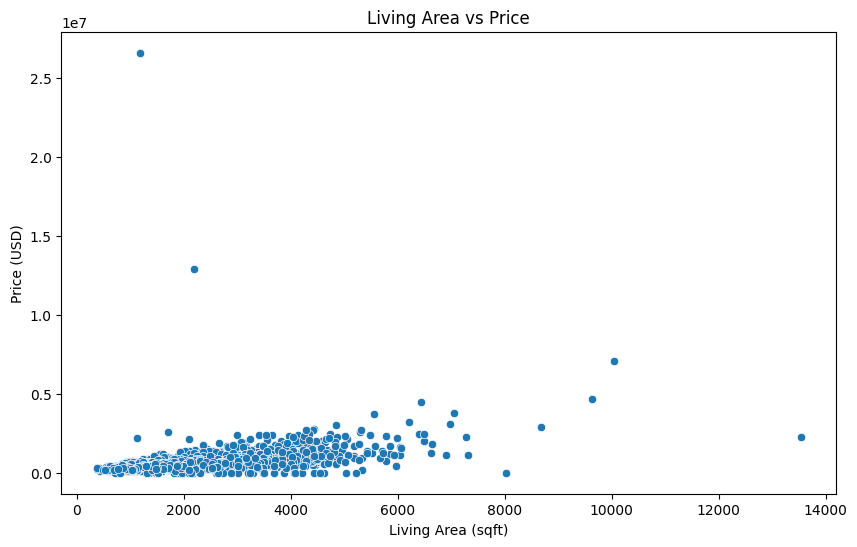

In [21]:
# Visualize important features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['sqft_living'], y=data['price'])
plt.title('Living Area vs Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

## Model Building

In [22]:

# Split features and target variable
X = data.drop('price', axis=1)
y = data['price']

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Results:")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}\n")

Linear Regression Results:
Mean Squared Error (MSE): 986950939927.71
Mean Absolute Error (MAE): 210924.86
R² Score: 0.03

Lasso Regression Results:
Mean Squared Error (MSE): 986922260288.08
Mean Absolute Error (MAE): 210908.30
R² Score: 0.03



c:\Users\Muhammad Haseeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+13, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(


Random Forest Results:
Mean Squared Error (MSE): 988853831861.83
Mean Absolute Error (MAE): 206253.41
R² Score: 0.03



In [26]:
import joblib
best_model = models['Random Forest']
joblib.dump(best_model, 'house_price_model.pkl')

['house_price_model.pkl']